# Make-up assignment for XBUS 506: Visual Analytics

Submit an end-to-end machine learning pipeline using Yellowbrick visualizations to support feature analysis (example here) and modeling (example here). Create a Jupyter notebook that:
- Downloads a new data set from the UCI machine learning repository (Note: this should be a dataset you have not already explored in class as part of the certificate program). 
- Loads the data.
- Performs a visual exploration of the data using Yellowbrick, annotated with text to explain your observations.
- Fits and visually compares two or more Scikit-Learn models using Yellowbrick, and identifies the best performing model, providing textual descriptions to explain your reasoning.
- Provides a brief conclusion with next steps that you would take (e.g. identifying one of the hyperparameters of your best performing model that you would experiment with to try to improve it's performance, explaining a cross-validation strategy, etc).


## default of credit card clients UCI Data Set 

Source:

Name: I-Cheng Yeh 
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw 
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan. 
other contact information: 886-2-26215656 ext. 3181 


Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- SEX: Gender (1 = male; 2 = female). 
- Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others). 
- AGE: Age (year). 
- PAY: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- BILL_AMT: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- PAY_AMT: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [1]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data ingestion from the UCI repository 

Here we are retrieving data from the UCI repository. We do this by:
- Write a function using os and requests
- Define the URL
- Define the file name
- Define the location
- Execute the function to fetch the data and save as CSV

In [2]:

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls"

def fetch_data(fname='cc_default.xls'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [3]:
print(DATA)

/Users/mwj8/Documents/Data Science/Alternative Assignment/cc_default.xls


In [4]:
FEATURES  = [
    "ID",
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "default_payment_next_month"  
]

LABEL_MAP = {
    1: "Yes",
    0: "No",
}

# Read the data into a DataFrame
df = pd.read_excel(DATA, skiprows=2, header=None, names=FEATURES, index_col="ID")

# Convert class labels into text
df["default_payment_next_month"] = df["default_payment_next_month"].map(LABEL_MAP)

# Describe the dataset
print(df.describe())

df.columns

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(df.groupby("default_payment_next_month")["default_payment_next_month"].count())

30000 instances with 24 features

default_payment_next_month
No     23364
Yes     6636
Name: default_payment_next_month, dtype: int64


In [8]:
# Replacing any null values with the median
df.fillna(df.median(),inplace=True)
print(df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

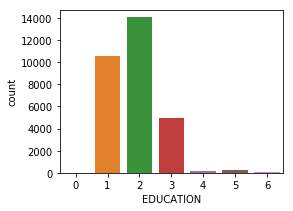

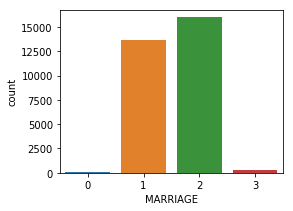

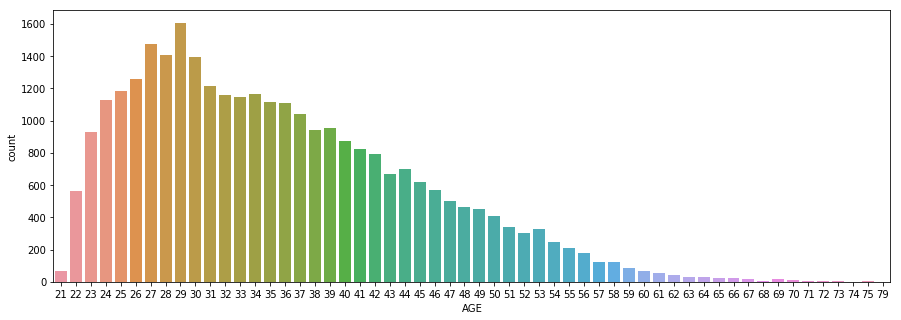

In [9]:
plt.figure(figsize=(4,3))
sns.countplot(data = df, x = "EDUCATION")

plt.figure(figsize=(4,3))
sns.countplot(data = df, x = "MARRIAGE")

plt.figure(figsize=(15,5))
sns.countplot(data = df, x = "AGE")

The first bar chart above shows us that the majority of people in this dataset have a college education. 

The next bar chart depicts that more people in this dataset are single.

The last graph tells us that ages in this dataset ranges from 21 to ~75.

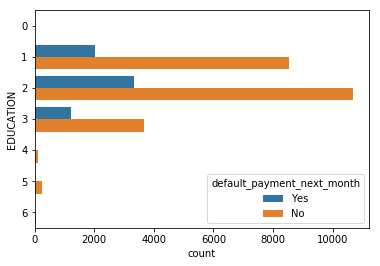

In [10]:
sns.countplot(y="EDUCATION", hue="default_payment_next_month", data=df,)

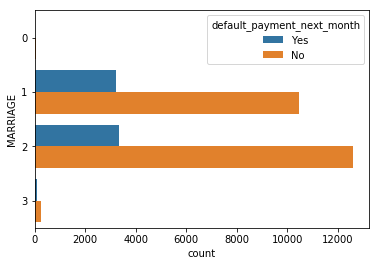

In [11]:
sns.countplot(y="MARRIAGE", hue="default_payment_next_month", data=df,)

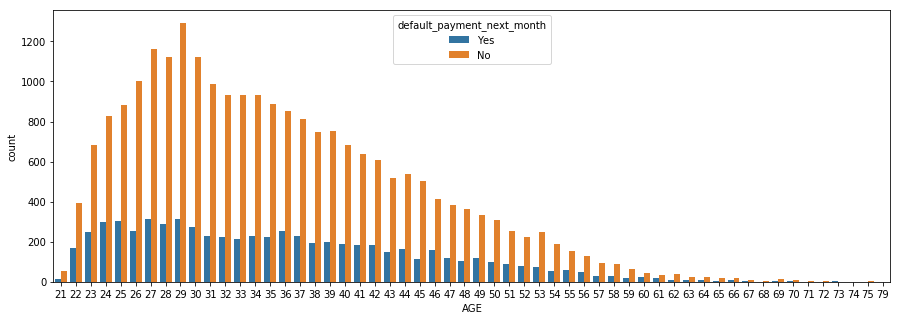

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x="AGE", hue="default_payment_next_month", data=df,)

The three bar chart above explore the same features as before, education, marriage, and age, only this time we've juxtaposed our target, defaulting on next month's payment. 

### Data Wrangling

Here we're using Scikit-Learn transformers to prepare data for ML. The sklearn.preprocessing package provides utility functions and transformer classes to help us transform input data so that it is better suited for ML. Here we're using LabelEncoder to encode the "default_payment" variable with a value between 0 and n_classes-1.


In [13]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
X = df[FEATURES[1:-1]]
y = df["default_payment_next_month"]

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(30000, 23) (30000,)


### Data Visualization

Here we're using Pandas to create various visualizations of our data.

First, I'm creating a matrix of scatter plots of the features in the dataset. This is useful for understanding how our features interact with eachother. For this section, I chose to only visualize 8 of the 23 features. This is useful for understanding how our features interact with eachother. I'm not sure I'm sensing any valuable insight from the scatter matrix below.

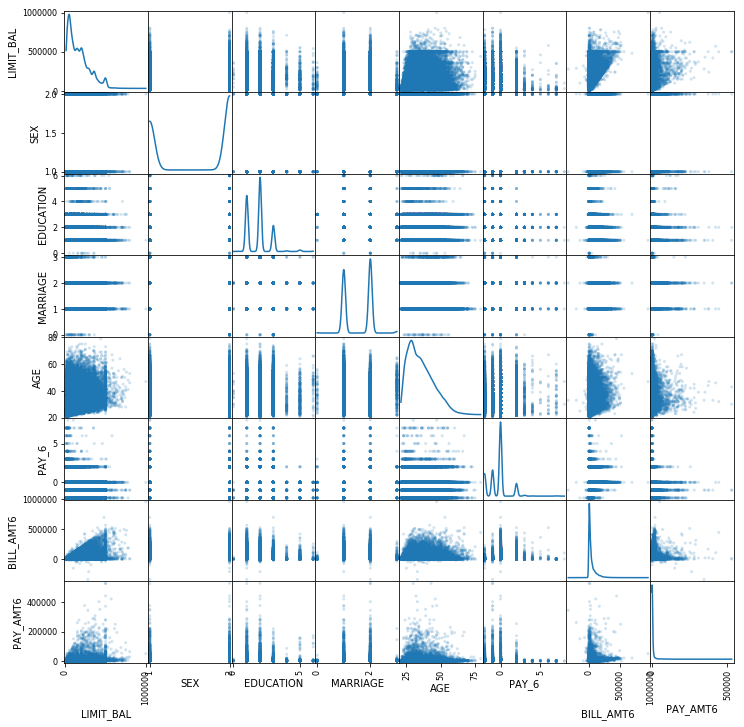

In [14]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df.ix[:,("LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_6","BILL_AMT6","PAY_AMT6",)]
    , alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

### Rank Features

Rank 2D is a two-dimensional ranking of features that utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix. The covariance and pearson plots below give us a better idea of which features we want to further explore.

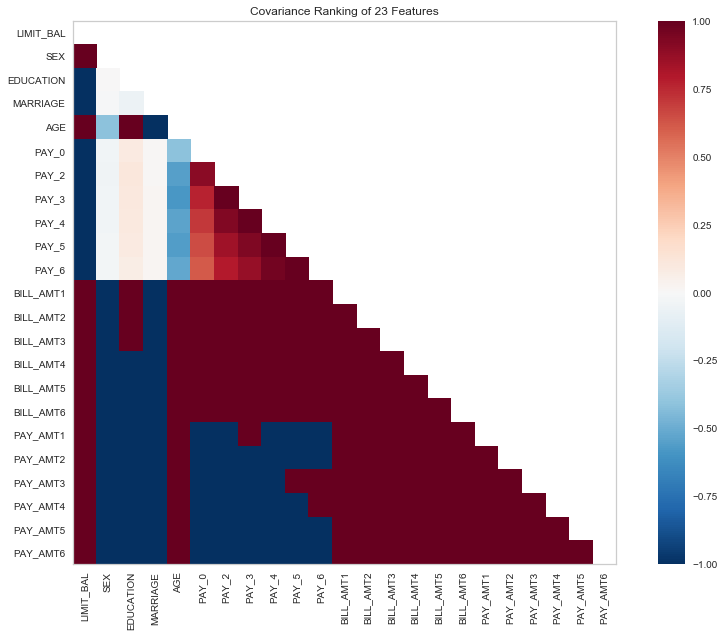

In [15]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="covariance", size=(1080, 720))
visualizer.fit_transform(X)
visualizer.poof()

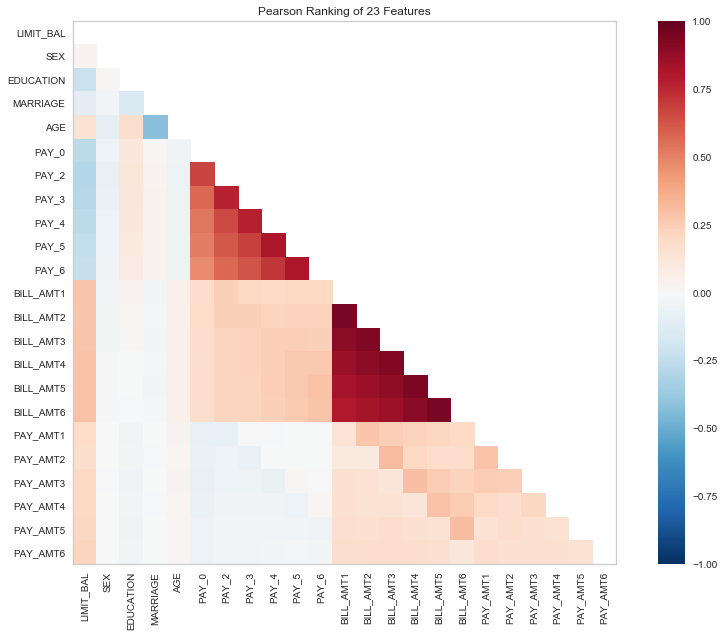

In [16]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson", size=(1080, 720))
visualizer.fit_transform(X)
visualizer.poof()

### RadViz

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.

Based on the Covariance and Pearson rankings, let's explore a few of the features with RadViz and Parallel Coordinates. 

In [17]:
# Extract our X and y data
X = df[FEATURES[1:12]]
y = df["default_payment_next_month"]

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

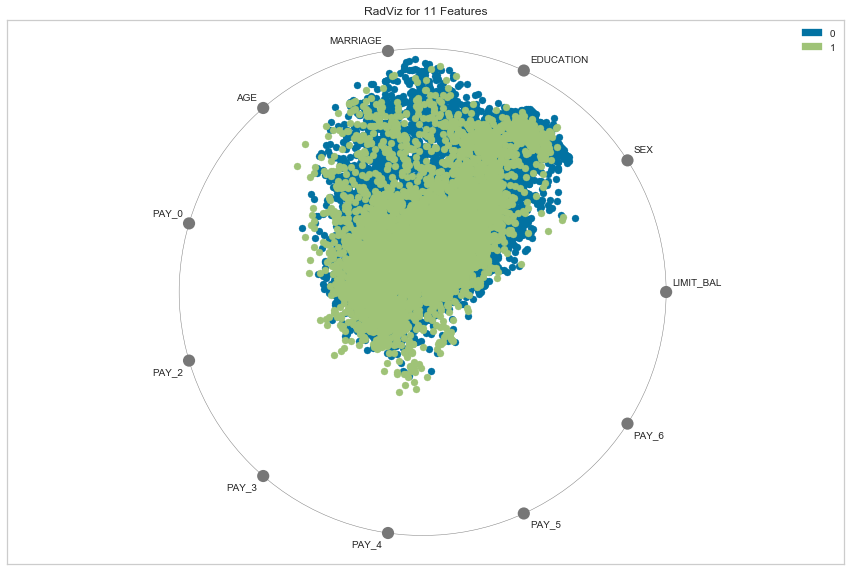

In [18]:
from yellowbrick.features import RadViz

# Specify the target classes
classes = [encoder.classes_]

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

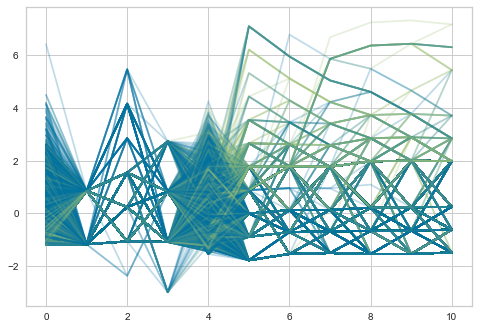

In [19]:
#Because the dataset is so large, I've decided to only take a 30% sample of the overall dataset.

from yellowbrick.features import ParallelCoordinates

_ = ParallelCoordinates(classes=encoder.classes_, normalize='standard', sample=0.3).fit_transform(X, y)


### Data Extraction
One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a Bunch (a class imported from the datasets module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A Bunch object exposes some important properties:

- data: array of shape n_samples * n_features
- target: array of length n_samples
- feature_names: names of the features
- target_names: names of the targets
- filenames: names of the files that were loaded
- DESCR: contents of the readme

Note: This does not preclude database storage of the data, in fact - a database can be easily extended to load the same Bunch API. Simply store the README and features in a dataset description table and load it from there. The filenames property will be redundant, but you could store a SQL statement that shows the data load.

In order to manage our data set on disk, we'll structure our data as follows:

In [20]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join( ".", "..", "Alternative Assignment"))
print(DATA_DIR)

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

/Users/mwj8/Documents/Data Science/Alternative Assignment
- cc_default.xls
- default-knn-classifier.pickle
- default-logistic-regression.pickle
- README.md
- default-svm-classifier.pickle
- Assignment for Visual Analytics.ipynb
- default-random-forest-classifier.pickle
- meta.json


In [21]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the default dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'cc_default.xls'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the excel file.
    dataset = pd.read_excel('cc_default.xls', skiprows=2, header=None, names=FEATURES, index_col="ID")

    # Extract the target from the data
    data = dataset[[ "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE","AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3","PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
    target = dataset["default_payment_next_month"]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(30000, 23)
(30000,)


### Classification

Now that we have a dataset Bunch loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers.

- Load the Algorithms!
- Metrics for evaluating performance
- K-Folds cross-validator provides train/test indices to split data in train/test sets.
- SVC algorithm
- K Neighbors Classifier
- Random Forest Classifier
- Logistic Regression

In [22]:
from sklearn import metrics

from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

from sklearn.preprocessing import OneHotEncoder

from yellowbrick.classifier import ClassificationReport

Define a function to evaluate the performance of the models
- Set our start time
- Define an empty array for our scores variable
- Define our training dataset and our test dataset
- Define estimator and fit to data
- Define predictor and set to data
- Calculate metrics for evaluating models
- Print evaluation report
- Write estimator to disc for future predictions
- Save model

In [23]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    kf = KFold(n_splits = 12, shuffle=True)

    for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk in order to use for future predictions on new data
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    #saving model with the pickle model
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

In [24]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Default SVM Classifier", gamma = 'auto')

Build and Validation of Default SVM Classifier took 1360.195 seconds
Validation scores are as follows:

precision    0.727772
recall       0.779233
accuracy     0.779233
f1           0.688174
dtype: float64

Fitted model written to:
/Users/mwj8/Documents/Data Science/Alternative Assignment/default-svm-classifier.pickle


In [25]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Default kNN Classifier", n_neighbors=12)

Build and Validation of Default kNN Classifier took 6.176 seconds
Validation scores are as follows:

precision    0.718296
recall       0.775967
accuracy     0.775967
f1           0.710919
dtype: float64

Fitted model written to:
/Users/mwj8/Documents/Data Science/Alternative Assignment/default-knn-classifier.pickle


In [26]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Default Random Forest Classifier")

Build and Validation of Default Random Forest Classifier took 8.556 seconds
Validation scores are as follows:

precision    0.784395
recall       0.806400
accuracy     0.806400
f1           0.782990
dtype: float64

Fitted model written to:
/Users/mwj8/Documents/Data Science/Alternative Assignment/default-random-forest-classifier.pickle


In [27]:
fit_and_evaluate(dataset, LogisticRegression, "Default Logistic Regression")

Build and Validation of Default Logistic Regression took 14.751 seconds
Validation scores are as follows:

precision    0.606546
recall       0.778733
accuracy     0.778733
f1           0.681931
dtype: float64

Fitted model written to:
/Users/mwj8/Documents/Data Science/Alternative Assignment/default-logistic-regression.pickle


In [28]:
# Creating a function to visualize estimators
def visual_fit_and_evaluate(X, y, estimator):
    visualizer = ClassificationReport(estimator, classes=['No', 'Yes'], cmap='PRGn')
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()

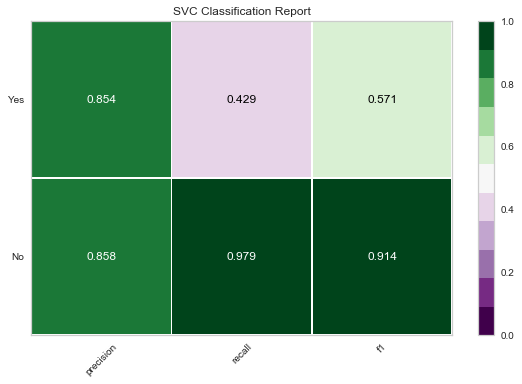

In [29]:
visual_fit_and_evaluate(X, y, SVC())

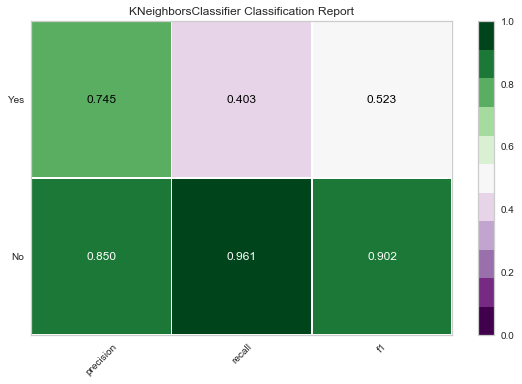

In [30]:
visual_fit_and_evaluate(X, y, KNeighborsClassifier())

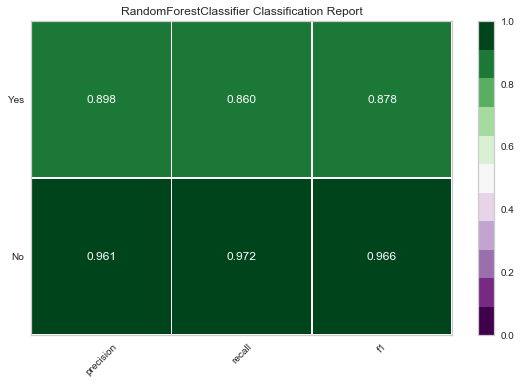

In [31]:
visual_fit_and_evaluate(X, y, RandomForestClassifier(class_weight='balanced'))

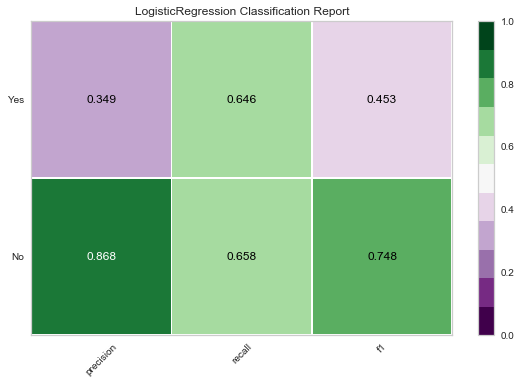

In [32]:
visual_fit_and_evaluate(X, y, LogisticRegression(class_weight='balanced'))

## Conclusion


While all estimators seem to be decent predictors, I believe the Random Forest classifier was the best in the preliminary fit and evaluation. This is because it has the highest F1 score, which is a measure of the test's accuracy taking into account both the precision and the recall. When it came to the visual fit and evaluation, the Random Forest classifier still seems to be the best model. However, all of the models yielded much higher F1 scores, especially the Random Forest classifier coming in at .96, which seems suspiciously high!

The next thing to do is to look into is how generalizable our model is, as we seem to be in danger of overfitting our data. I would experiment with cross-validation for the Random Forest Classier to assess how generalizable the model is as well as grid searching to ensure that I'm using the best parameters for each model. 